In [46]:
import cv2
import json
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Set paths
dataset_path = "/content/drive/MyDrive/Dataset-"
image_path = os.path.join(dataset_path, "image")
json_path = os.path.join(dataset_path, "_annotations.coco.json")

# Load JSON file
with open(json_path, "r") as f:
    data = json.load(f)

In [49]:
# Split the dataset into training and testing sets
image_ids = set()
for annotation in data["annotations"]:
    image_ids.add(annotation["image_id"])
train_image_ids, test_image_ids = train_test_split(list(image_ids), test_size=0.2)

# Define a function to draw bounding boxes on images
def draw_boxes(img, annotations):
    for annotation in annotations:
        # Get the coordinates for the bounding box
        x, y, w, h = annotation["bbox"]
        x, y, w, h = int(x), int(y), int(w), int(h)

        # Draw the bounding box and text
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 0), 2)
        cv2.putText(img, "extinguisher", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

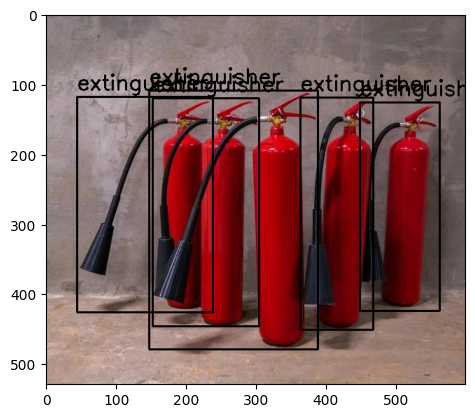

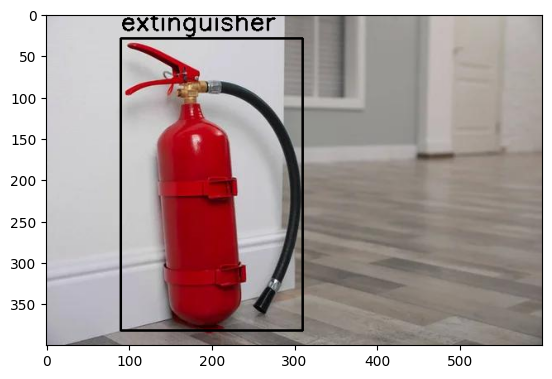

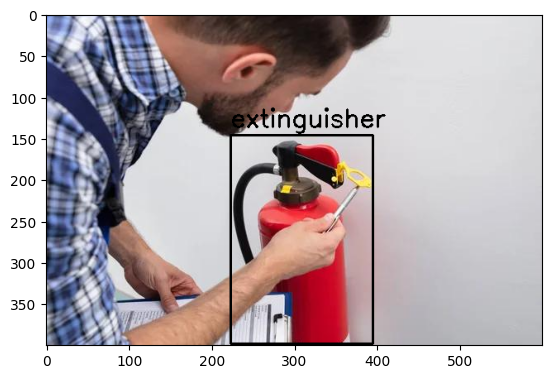

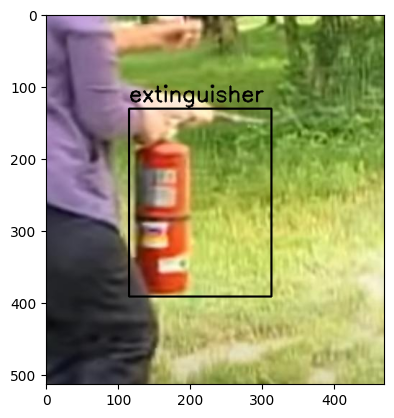

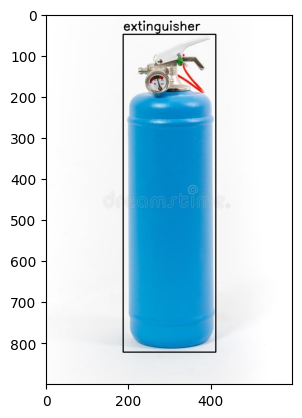

In [50]:
# Loop through the images in the training set
train_acc = 0
num_train_images = 0
for image in data["images"]:
    if image["id"] not in train_image_ids or num_train_images >= 5:
        continue
    num_train_images += 1

    # Load the image
    img = cv2.imread(os.path.join(image_path, image["file_name"]))

    # Extract the annotations for the current image
    annotations = []
    for annotation in data["annotations"]:
        if annotation["image_id"] == image["id"]:
            annotations.append(annotation)

    # Draw bounding boxes on the image
    draw_boxes(img, annotations)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # Increment the accuracy counter
    train_acc += len(annotations)

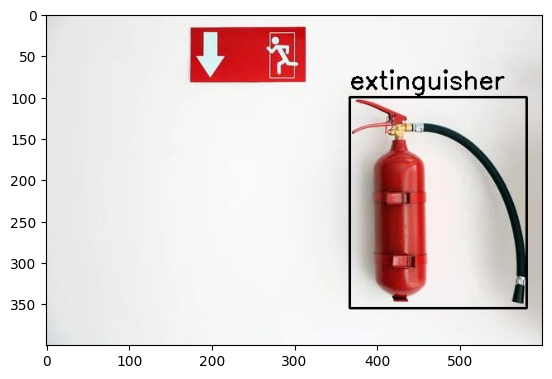

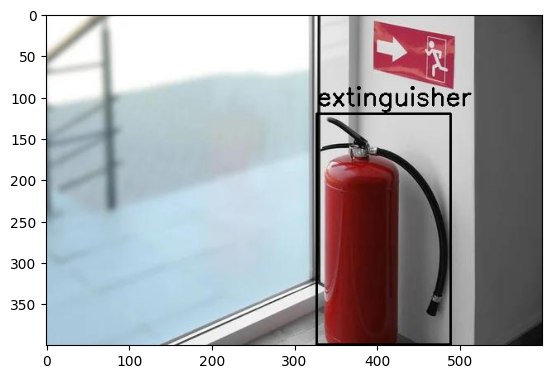

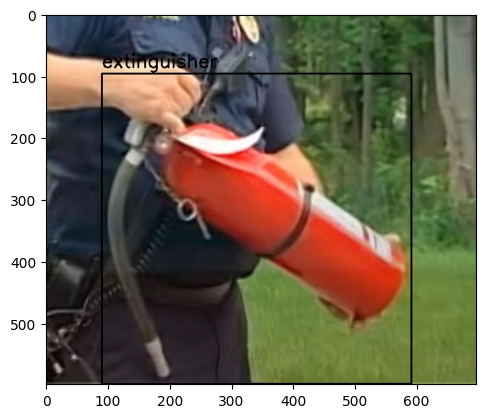

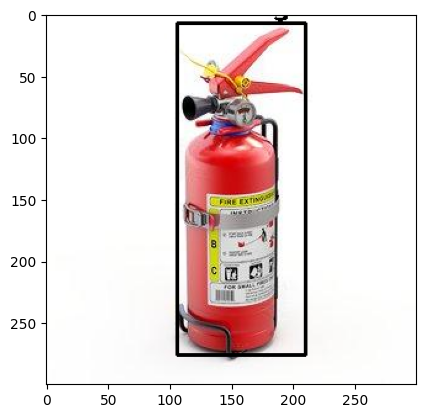

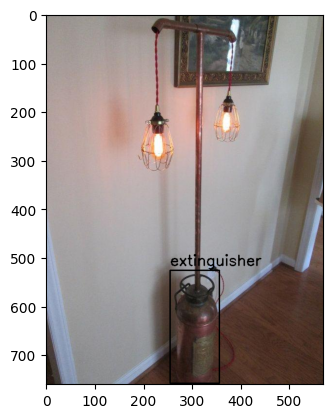

Accuracy: 64.29%


In [51]:
# Loop through the images in the testing set
test_acc = 0
num_test_images = 0
for image in data["images"]:
    if image["id"] not in test_image_ids or num_test_images >= 5:
        continue
    num_test_images += 1

    # Load the image
    img = cv2.imread(os.path.join(image_path, image["file_name"]))

    # Extract the annotations for the current image
    annotations = []
    for annotation in data["annotations"]:
        if annotation["image_id"] == image["id"]:
            annotations.append(annotation)

    # Draw bounding boxes on the image
    draw_boxes(img, annotations)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # Increment the accuracy counter
    test_acc += len(annotations)

# Calculate and print the accuracy score
total_acc = train_acc + test_acc
accuracy = train_acc / total_acc
print("Accuracy: {:.2f}%".format(accuracy * 100))